In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.keras.layers.RandomFlip

keras.src.layers.preprocessing.random_flip.RandomFlip

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory('./Teeth_Dataset/Training', image_size=(256,256), shuffle=True, batch_size=32)

Found 3087 files belonging to 7 classes.


In [5]:
data_validation=tf.keras.utils.image_dataset_from_directory('./Teeth_Dataset/Validation', image_size=(256,256), shuffle=True, batch_size=32)

Found 1028 files belonging to 7 classes.


In [6]:
data_test=tf.keras.utils.image_dataset_from_directory('./Teeth_Dataset/Testing', image_size=(256,256), shuffle=True, batch_size=32)

Found 1508 files belonging to 10 classes.


In [7]:
data_train.class_names

['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']

In [8]:
# data_iter = data_train.as_numpy_iterator()

In [9]:
#to get another batch from the iterator
# batch = data_iter.next()

In [10]:
#image representation as numpy array
# batch[0].shape

In [11]:
# batch[0]

In [12]:
# batch[1]

 #preprocessing

In [13]:
##Preprocessing
# so the data is between 0 and 255 so i will make it between 0 and 1 to make it evaluate better
# batch[0].max()

In [14]:
# scaled=batch[0]/255
# scaled[0].max()

In [15]:
data_train=data_train.map(lambda x,y:(x/255,y))
scaled_iterator=data_train.as_numpy_iterator()
batch_train=scaled_iterator.next()

In [16]:
data_validation=data_validation.map(lambda x,y:(x/255,y))
scaled_iterator_val=data_validation.as_numpy_iterator()
batch_validation=scaled_iterator.next()

In [17]:
batch_train[0].max()
# batch[0].min()

1.0

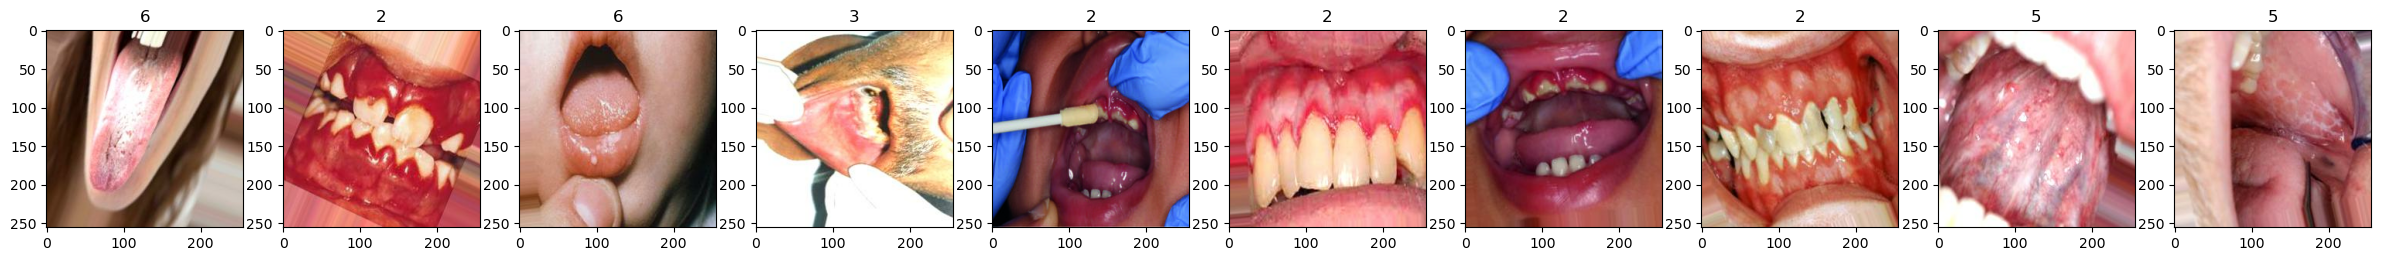

In [18]:
fig, ax = plt.subplots(ncols = 10, figsize= (30, 30))
for idx, img in enumerate(batch_train[0][:10]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch_train[1][idx])

In [19]:
batch_train

(array([[[[0.5019608 , 0.35686275, 0.29411766],
          [0.5019608 , 0.35686275, 0.29411766],
          [0.5019608 , 0.35686275, 0.29411766],
          ...,
          [0.22745098, 0.13725491, 0.06666667],
          [0.21960784, 0.12941177, 0.05882353],
          [0.21176471, 0.12156863, 0.05098039]],
 
         [[0.50980395, 0.3647059 , 0.3019608 ],
          [0.50980395, 0.3647059 , 0.3019608 ],
          [0.50980395, 0.3647059 , 0.3019608 ],
          ...,
          [0.22745098, 0.13725491, 0.06666667],
          [0.22352941, 0.13333334, 0.0627451 ],
          [0.21568628, 0.1254902 , 0.05490196]],
 
         [[0.5176471 , 0.37254903, 0.30980393],
          [0.5176471 , 0.37254903, 0.30980393],
          [0.5176471 , 0.37254903, 0.30980393],
          ...,
          [0.22352941, 0.13333334, 0.0627451 ],
          [0.22352941, 0.13333334, 0.0627451 ],
          [0.21960784, 0.12941177, 0.05882353]],
 
         ...,
 
         [[0.34117648, 0.2       , 0.10588235],
          [0.34509

In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential([
    Conv2D(64, (5, 5), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(7, activation='softmax')  # Assuming 7 categories
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 252, 252, 64)   │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 124, 124, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │    14,745,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,921,063 (56.92 MB)

 Trainable params: 14,921,063 (56.92 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)



In [26]:
history = model.fit(
    data_train,
    validation_data=data_validation,
    epochs=25,
    callbacks=[early_stopping, checkpoint]
)


Epoch 1/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.1844 - loss: 1.9349 - val_accuracy: 0.3434 - val_loss: 1.7750
Epoch 2/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.3101 - loss: 1.7371 - val_accuracy: 0.3560 - val_loss: 1.6237
Epoch 3/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.4244 - loss: 1.4772 - val_accuracy: 0.4484 - val_loss: 1.5595
Epoch 4/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.5707 - loss: 1.1348 - val_accuracy: 0.4932 - val_loss: 1.6023
Epoch 5/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.7316 - loss: 0.7442 - val_accuracy: 0.5409 - val_loss: 1.7160
Epoch 6/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.8671 - loss: 0.3740 - val_accuracy: 0.5700 - val_loss: 1.8907
Epoch 7/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.9380 - loss: 0.2034 - val_accuracy: 0.5146 - val_loss: 2.5940
Epoch 8/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.9569 - loss: 0.1389 - val_accuracy: 0.5671 - v